<a href="https://colab.research.google.com/github/haniahhaq/CS7641-assignment-1/blob/master/Mobilea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('trains.csv')
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
data.drop('sc_w', axis = 1, inplace = True)

In [ ]:
y = data['price_range']
X = data.drop('price_range', axis = 1)

In [ ]:
data['price_range'].value_counts().to_frame().T

,1,2,3,0
price_range,500,500,500,500


In [ ]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,19,1,1,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

# Function for Cross validation
def model_ev(actual,predict):
    
    accu = accuracy_score(actual,predict)
    print(f'Accuracy score is {accu}')
    
# Cross validation
y_train_pred = clf_gini.predict(X_train)
print(f'Train precision = ', end = ' ')
model_ev(y_train,y_train_pred)
y_test_pred = clf_gini.predict(X_test)
print(f'Test precision = ', end = ' ')
model_ev(y_test,y_test_pred)

clf_gini_score = clf_gini.score(X_test, y_test)
clf_gini_score

Train precision =  Accuracy score is 0.769375
Test precision =  Accuracy score is 0.7325


0.7325

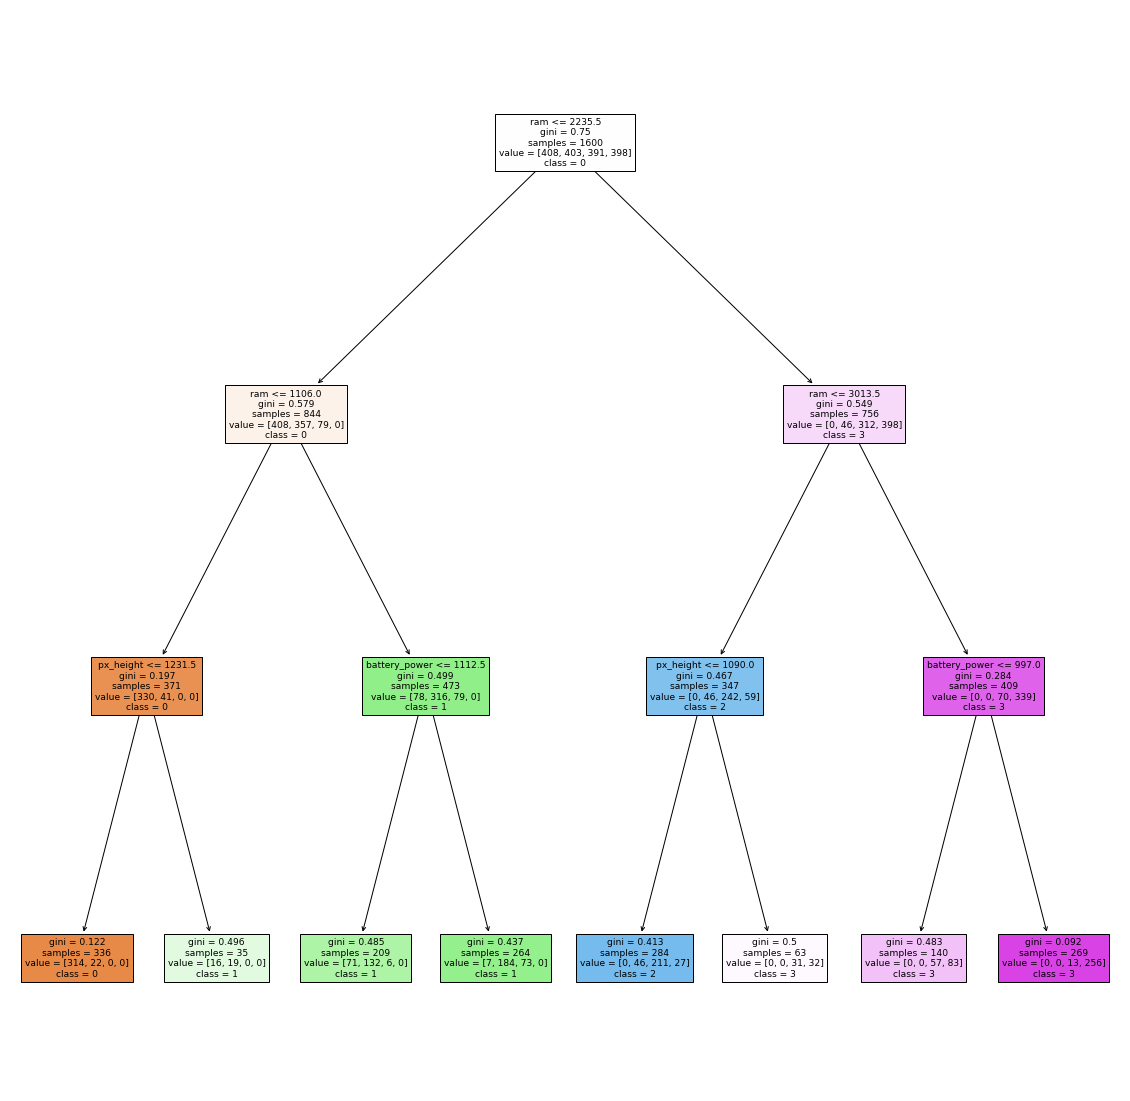

In [ ]:
from sklearn import tree
plt.figure(figsize=(20,20))
features = data.columns
classes = ['0', '1', '2', '3']
tree.plot_tree(clf_gini,feature_names=features,class_names=classes,filled=True)
plt.show()

In [ ]:
path = clf_gini.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00836726 0.00902971 0.01194049 0.01481869 0.08548309
 0.11224902 0.18538994]


In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

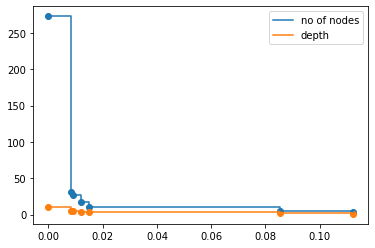

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

In [ ]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(accuracy_score(y_train,y_train_pred))
    test_acc.append(accuracy_score(y_test,y_test_pred))


In [ ]:
from sklearn.metrics import plot_confusion_matrix
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.020)
clf_.fit(X_train,y_train)
y_train_pred = clf_.predict(X_train)
y_test_pred = clf_.predict(X_test)

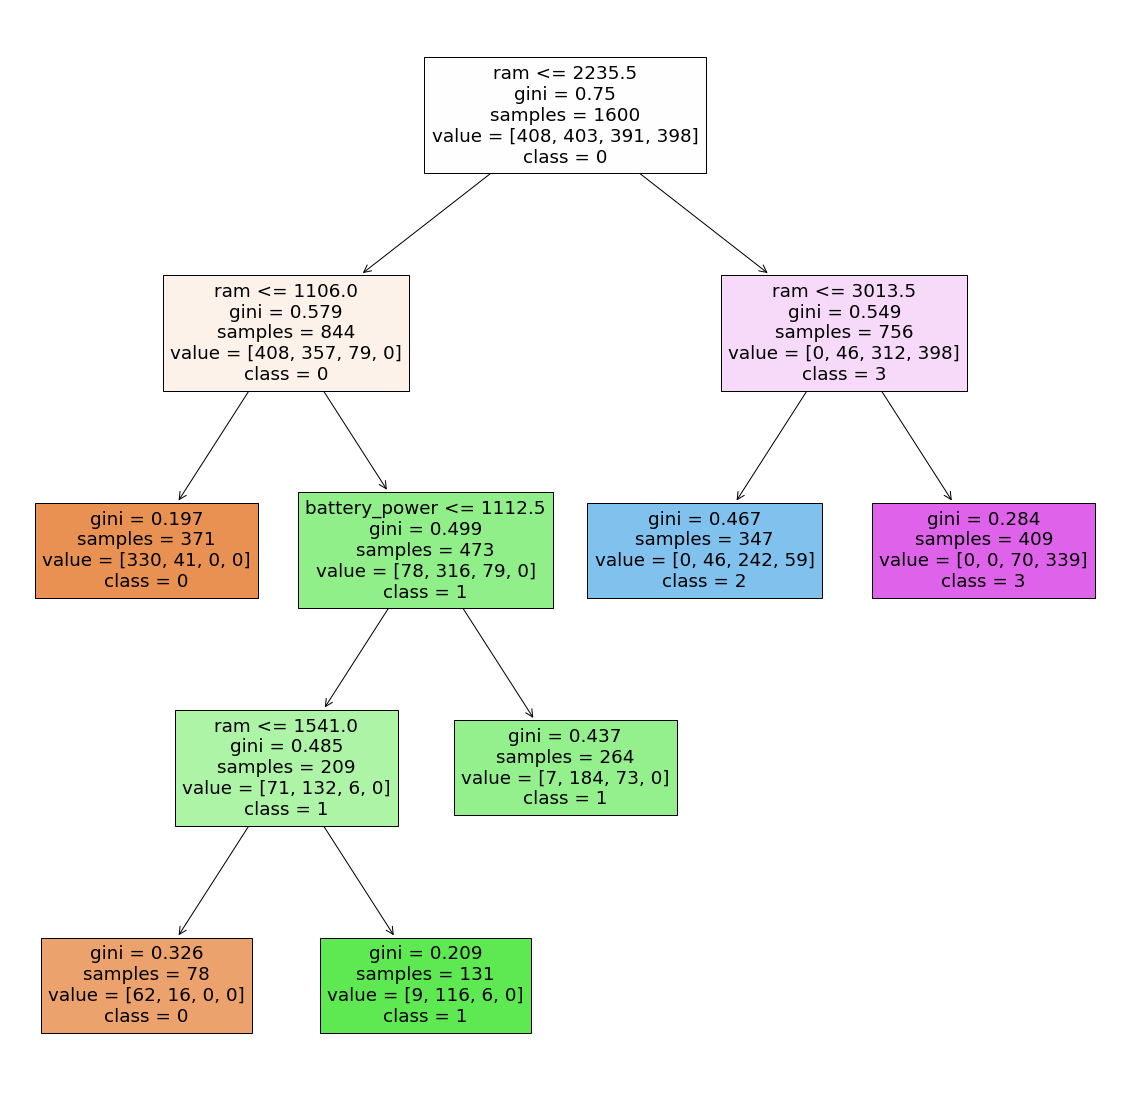

In [ ]:
plt.figure(figsize=(20,20))
features = data.columns
classes = ['0', '1', '2', '3']
tree.plot_tree(clf_,feature_names=features,class_names=classes,filled=True)
plt.show()

In [ ]:
clf_gini_score = clf_.score(X_test, y_test)
clf_gini_score

0.77

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KMeans
from sklearn import datasets
from sklearn.model_selection import learning_curve
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=10)
sizes, training_scores, testing_scores = learning_curve(clf_, X, y, cv=10, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))

In [ ]:
train_mean = np.mean(training_scores, axis=1)
train_std = np.std(training_scores, axis=1)

test_mean = np.mean(testing_scores, axis=1)
test_std = np.std(testing_scores, axis=1)

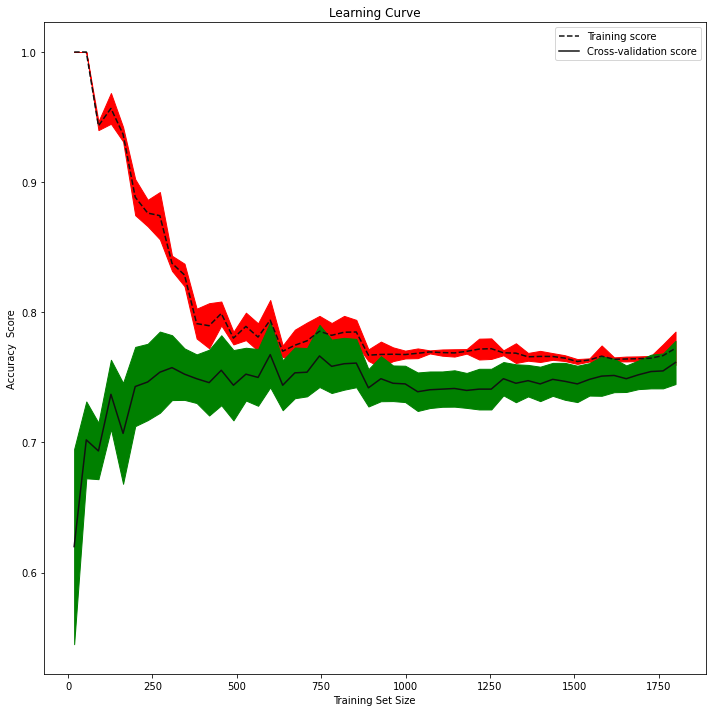

In [ ]:
plt.subplots(1, figsize=(10,10))
plt.plot(sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(sizes, test_mean, color="#111111", label="Cross-validation score")
plt.fill_between(sizes, train_mean - train_std, train_mean + train_std, color="red")
plt.fill_between(sizes, test_mean - test_std, test_mean + test_std, color="green")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy  Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)


accuracy_score(y_test, predictions)

0.925

In [ ]:
y_test

115     3
1779    3
1449    2
145     3
1009    1
       ..
470     3
1661    1
1896    0
28      2
1510    1
Name: price_range, Length: 400, dtype: int64

In [ ]:
predictions

array([3, 3, 2, 3, 1, 3, 3, 3, 1, 3, 2, 3, 0, 1, 0, 3, 2, 3, 2, 2, 3, 3,
       0, 1, 0, 0, 3, 3, 1, 1, 2, 0, 3, 2, 2, 2, 1, 0, 2, 0, 3, 2, 2, 0,
       1, 3, 1, 0, 1, 2, 1, 3, 2, 2, 2, 3, 2, 3, 0, 0, 1, 1, 0, 0, 2, 0,
       2, 0, 2, 3, 2, 2, 1, 1, 3, 1, 3, 3, 2, 1, 2, 0, 0, 0, 0, 3, 1, 3,
       3, 3, 2, 3, 3, 3, 3, 1, 0, 1, 1, 1, 3, 0, 1, 2, 1, 3, 2, 1, 2, 2,
       2, 0, 3, 1, 2, 1, 1, 1, 3, 0, 1, 0, 3, 2, 1, 3, 0, 3, 2, 0, 3, 3,
       3, 1, 2, 0, 0, 2, 3, 1, 3, 0, 3, 2, 0, 3, 2, 1, 2, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 2, 1, 1, 2, 3, 2, 2, 2, 0, 1, 2, 1, 3, 3, 3, 2, 0, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 3, 0, 2, 2, 0, 2, 0, 2, 1, 3, 2, 0, 0, 0,
       0, 3, 1, 3, 3, 3, 2, 2, 1, 2, 2, 1, 2, 1, 1, 3, 3, 1, 3, 1, 3, 1,
       3, 2, 0, 3, 0, 0, 2, 2, 1, 1, 1, 1, 0, 3, 0, 1, 0, 2, 0, 3, 1, 2,
       0, 1, 1, 2, 2, 3, 0, 3, 1, 1, 0, 3, 2, 1, 2, 1, 0, 3, 3, 1, 1, 1,
       3, 2, 3, 0, 2, 2, 2, 2, 0, 3, 0, 3, 1, 1, 2, 0, 3, 3, 0, 1, 1, 1,
       3, 0, 0, 2, 1, 0, 2, 3, 2, 1, 3, 0, 0, 3, 1,

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KMeans
from sklearn import datasets
from sklearn.model_selection import learning_curve
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=10)
sizes, training_scores, testing_scores = learning_curve(clf_, X, y, cv=10, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))

In [ ]:
train_mean = np.mean(training_scores, axis=1)
train_std = np.std(training_scores, axis=1)

test_mean = np.mean(testing_scores, axis=1)
test_std = np.std(testing_scores, axis=1)

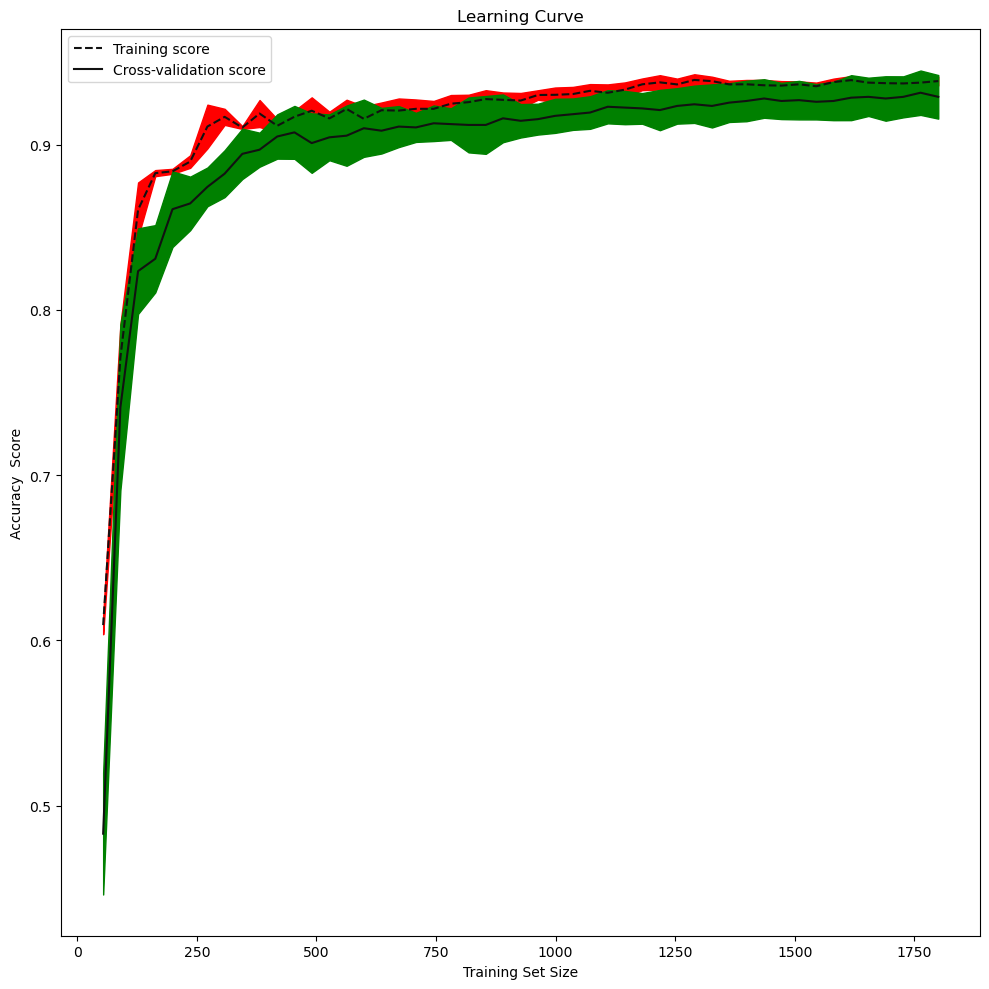

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve

 
# Setting the range for the parameter (from 1 to 10)
parameter_range = np.arange(1, 100, 1)
 
# Calculate accuracy on training and test set using the

train_score, test_score = validation_curve(clf_, X, y,
                                       param_name = "min_samples_leaf",
                                       param_range = parameter_range,
                                        cv = 5, scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)

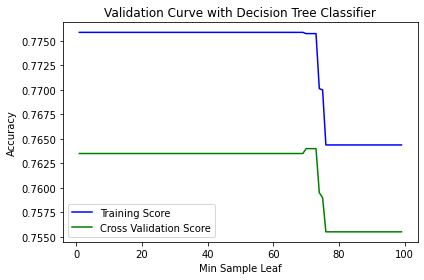

In [ ]:
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with Decision Tree Classifier")
plt.xlabel("Min Sample Leaf")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve

 
# Setting the range for the parameter (from 1 to 10)
parameter_range = np.arange(1, 50, 2)
 
# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, test_score = validation_curve(clf_gini, X, y,
                                       param_name = "max_depth",
                                       param_range = parameter_range,
                                        cv = 5, scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)

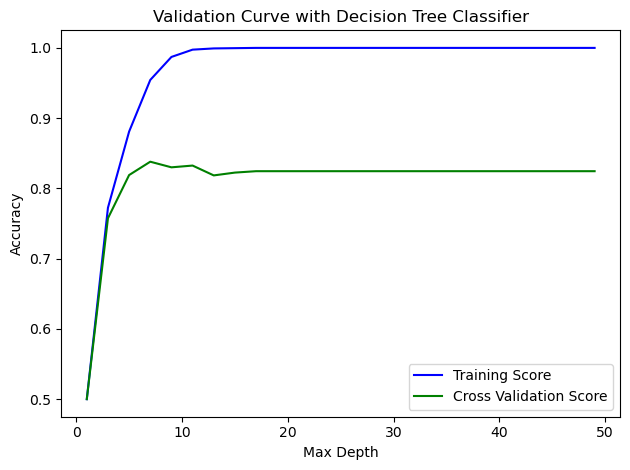

In [ ]:
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with Decision Tree Classifier")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel="poly", degree=8)
svc.fit(X_train, y_train)

In [ ]:
y_pred_svc = svc.predict(X_test)

In [ ]:
accuracy_svc = metrics.accuracy_score(y_test, y_pred_svc)
accuracy_svc

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KMeans
from sklearn import datasets
from sklearn.model_selection import learning_curve
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=10)
sizes, training_scores, testing_scores = learning_curve(svc, X, y, cv=10, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))

In [ ]:
train_mean = np.mean(training_scores, axis=1)
train_std = np.std(training_scores, axis=1)

test_mean = np.mean(testing_scores, axis=1)
test_std = np.std(testing_scores, axis=1)

In [ ]:
plt.subplots(1, figsize=(10,10))
plt.plot(sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(sizes, test_mean, color="#111111", label="Cross-validation score")
plt.fill_between(sizes, train_mean - train_std, train_mean + train_std, color="red")
plt.fill_between(sizes, test_mean - test_std, test_mean + test_std, color="green")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy  Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
dtc = DecisionTreeClassifier(criterion="gini", max_depth=3)

ada_model = AdaBoostClassifier(algorithm='SAMME.R',
    base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini',max_depth=3,
    max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1, min_samples_split=2,
    min_weight_fraction_leaf=0.0, random_state=None,
    splitter='best'),
    learning_rate=1.0, n_estimators=100, random_state=None)
ada_model=ada_model.fit(X_train,y_train)

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(ada_model, X, y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

In [ ]:

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#n_scores = cross_val_score(ada_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
test_mean = np.std(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

In [ ]:
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="red",  label="Training score")
plt.plot(train_sizes, test_mean, color="green", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve AdaBoost Classifier")
plt.xlabel("Train Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
ab_clf = AdaBoostClassifier()
parameters = {
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)]
}
clf = GridSearchCV(ab_clf, parameters, cv=5)
clf.fit(X_train, y_train)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve

# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, test_score = validation_curve(ab_clf, X, y,
                                       param_name = "learning_rate",
                                       param_range = parameters['learning_rate'],
                                        cv = 5, scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)

In [ ]:
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameters['learning_rate'], mean_train_score,
label = "Training Score", color = 'b')
plt.plot(parameters['learning_rate'], mean_test_score,
label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with AdaBoost Classifier")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [ ]:
# Function for Cross validation
def model_ev(actual,predict):
    
    accu = accuracy_score(actual,predict)
    print(f'Accuracy score is {accu}')
    
# Cross validation
y_train_pred = clf.predict(X_train)
print(f'Train precision = ', end = ' ')
model_ev(y_train,y_train_pred)
y_test_pred = clf.predict(X_test)
print(f'Test precision = ', end = ' ')
model_ev(y_test,y_test_pred)

In [ ]:
parameters = {
    'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20, 30, 100]
}
clf = GridSearchCV(ab_clf, parameters, cv=5)
clf.fit(X_train, y_train)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve

# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, test_score = validation_curve(ab_clf, X, y,
                                       param_name = "n_estimators",
                                       param_range = parameters['n_estimators'],
                                        cv = 5, scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)

In [ ]:
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameters['n_estimators'], mean_train_score,
label = "Training Score", color = 'b')
plt.plot(parameters['n_estimators'], mean_test_score,
label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with AdaBoost Classifier")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', RandomForestRegressor(n_estimators=50,
                                                              random_state=0))
                             ])

In [ ]:
tree_score = cross_val_score(clf_gini, X_train, y_train, cv=5)

In [ ]:
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

In [ ]:
svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

In [ ]:
knears_score = cross_val_score(knn, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)
clf.fit(X,y)

In [ ]:
clf.predict(X_test)

In [ ]:
# Function for Cross validation
def model_ev(actual,predict):
    
    accu = accuracy_score(actual,predict)
    print(f'Accuracy score is {accu}')
    
# Cross validation
y_train_pred = clf.predict(X_train)
print(f'Train precision = ', end = ' ')
model_ev(y_train,y_train_pred)
y_test_pred = clf.predict(X_test)
print(f'Test precision = ', end = ' ')
model_ev(y_test,y_test_pred)

clf_gini_score = clf.score(X_test, y_test)
clf_gini_score

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

In [ ]:
X = data.iloc[:,:20].values
y = data.iloc[:,20:21].values

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [ ]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64)

In [ ]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))
y_pred
y_test

In [ ]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

In [ ]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

In [ ]:
# Function for Cross validation
def model_ev(actual,predict):
    
    accu = accuracy_score(actual,predict)
    print(f'Accuracy score is {accu}')
    
# Cross validation
y_train_pred = clf_gini.predict(X_train)
print(f'Train precision = ', end = ' ')
model_ev(y_train,y_train_pred)
y_test_pred = clf_gini.predict(X_test)
print(f'Test precision = ', end = ' ')
model_ev(y_test,y_test_pred)

clf_gini_score = clf_gini.score(X_test, y_test)
clf_gini_score

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KMeans
from sklearn import datasets
from sklearn.model_selection import learning_curve
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=10)
from sklearn.neural_network import MLPClassifier
clfs = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)
sizes, training_scores, testing_scores = learning_curve(clfs, X, y, cv=10, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
train_mean = np.mean(training_scores, axis=1)
train_std = np.std(training_scores, axis=1)
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#n_scores = cross_val_score(ada_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
test_mean = np.std(testing_scores, axis=1)
test_std = np.std(testing_scores, axis=1)

In [ ]:
plt.subplots(1, figsize=(10,10))
plt.plot(sizes, train_mean, '--', color="red",  label="Training score")
plt.plot(sizes, test_mean, color="green", label="Cross-validation score")

plt.fill_between(sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve for Neural Network")
plt.xlabel("Train Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf

#X_train = X_train.values.reshape(, 784)
#X_train = X_train.astype('float32') / 255.0
#X_test = X_test.astype('float32') / 255.0

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [ ]:
model = tf.keras.Sequential()
# flattening the layer
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
# defining hidden layer with 200 nodes
model.add(tf.keras.layers.Dense(units=200, activation='relu'))
model.add(tf.keras.layers.Dense(units=200, activation='relu'))
# adding a drop out in the hidden layer
model.add(tf.keras.layers.Dropout(0.2))
# adding output laers
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              
#               loss function is categorical cross entropy
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)
# Training the model using 10 epochs
#np.reshape(X_train, (-1, 72, 72, 3)) 
model.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=2)

In [ ]:
X = data.iloc[:,:20].values
y = data.iloc[:,20:21].values

In [ ]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [ ]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
19/19 [==============================] - 1s 1ms/step - loss: 1.4200 - accuracy: 0.3058
Epoch 2/100
19/19 [==============================] - 0s 1ms/step - loss: 1.3591 - accuracy: 0.3375
Epoch 3/100
19/19 [==============================] - 0s 1ms/step - loss: 1.3277 - accuracy: 0.3683
Epoch 4/100
19/19 [==============================] - 0s 2ms/step - loss: 1.2997 - accuracy: 0.3850
Epoch 5/100
19/19 [==============================] - 0s 1ms/step - loss: 1.2691 - accuracy: 0.4217
Epoch 6/100
19/19 [==============================] - 0s 1ms/step - loss: 1.2361 - accuracy: 0.4558
Epoch 7/100
19/19 [==============================] - 0s 1ms/step - loss: 1.1996 - accuracy: 0.4917
Epoch 8/100
19/19 [==============================] - 0s 1ms/step - loss: 1.1581 - accuracy: 0.5100
Epoch 9/100
19/19 [==============================] - 0s 1ms/step - loss: 1.1122 - accuracy: 0.5400
Epoch 10/100
19/19 [==============================] - 0s 1ms/step - loss: 1.0603 - accuracy: 0.5658
Epoch 11/

In [ ]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

25/25 [==============================] - 0s 831us/step


In [ ]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 92.125


In [ ]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=1000, batch_size=64)

Epoch 1/1000
19/19 [==============================] - 0s 14ms/step - loss: 0.0551 - accuracy: 0.9942 - val_loss: 0.1997 - val_accuracy: 0.9200
Epoch 2/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0542 - accuracy: 0.9933 - val_loss: 0.2006 - val_accuracy: 0.9212
Epoch 3/1000
19/19 [==============================] - 0s 4ms/step - loss: 0.0538 - accuracy: 0.9933 - val_loss: 0.2026 - val_accuracy: 0.9212
Epoch 4/1000
19/19 [==============================] - 0s 3ms/step - loss: 0.0522 - accuracy: 0.9958 - val_loss: 0.2012 - val_accuracy: 0.9212
Epoch 5/1000
19/19 [==============================] - 0s 3ms/step - loss: 0.0513 - accuracy: 0.9950 - val_loss: 0.2019 - val_accuracy: 0.9212
Epoch 6/1000
19/19 [==============================] - 0s 3ms/step - loss: 0.0509 - accuracy: 0.9958 - val_loss: 0.2033 - val_accuracy: 0.9200
Epoch 7/1000
19/19 [==============================] - 0s 3ms/step - loss: 0.0498 - accuracy: 0.9967 - val_loss: 0.2025 - val_accuracy: 0.9200
Epoch

In [ ]:
model.predict(X_test)

25/25 [==============================] - 0s 1ms/step


array([[1.00000000e+00, 5.75397785e-11, 0.00000000e+00, 0.00000000e+00],
       [9.96540427e-01, 3.45963077e-03, 1.50592099e-34, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 3.93642694e-07, 9.99999642e-01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 8.26700080e-12, 1.00000000e+00],
       [1.57003810e-29, 1.00000000e+00, 7.60757929e-21, 0.00000000e+00],
       [3.87327730e-34, 4.50723278e-16, 1.00000000e+00, 1.25010295e-20]],
      dtype=float32)

In [ ]:
model.evaluate(X_test,y_test)

25/25 [==============================] - 0s 1ms/step - loss: 0.9993 - accuracy: 0.9000


[0.9993445873260498, 0.8999999761581421]

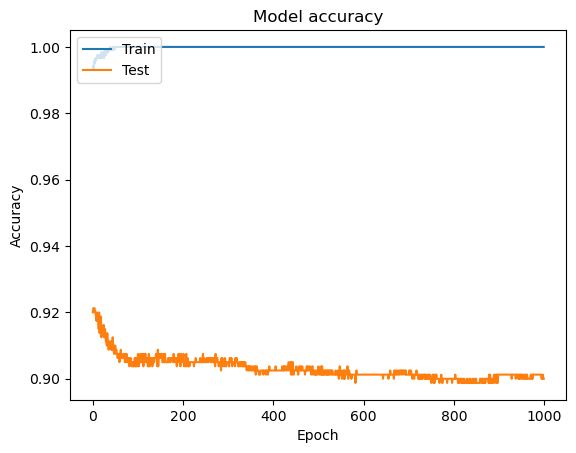

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

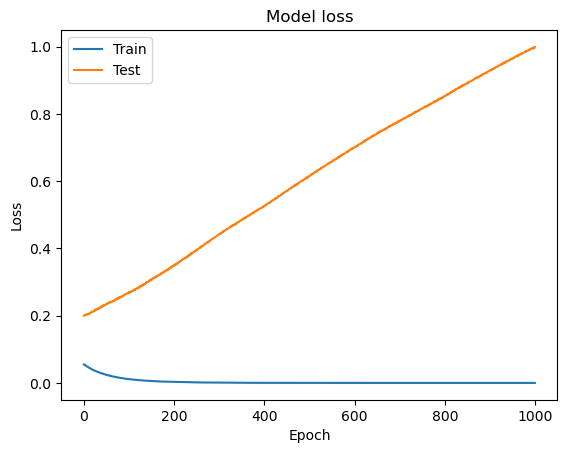

In [ ]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test']) 
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KMeans
from sklearn import datasets
from sklearn.model_selection import learning_curve
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=10)
from sklearn.neural_network import MLPClassifier
clfs = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(15,2), random_state=1)
sizes, training_scores, testing_scores = learning_curve(clfs, X, y, cv=10, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))